<b>Churn prediction means detecting which customers are likely to leave a service or to cancel a subscription to a service. It is a critical prediction for many businesses because acquiring new clients often costs more than retaining existing ones.</b>

Building a customer churn prediction project is a great way to leverage machine learning to anticipate when customers are likely to leave your service or product. Here's a high-level overview of the steps you might take:

<b>Data Collection:</b> Gather historical data on customer interactions, transactions, demographics, and any other relevant information. This data will serve as the foundation for your analysis.

<b>Data Preprocessing:</b> This step involves cleaning the data, handling missing values, encoding categorical variables, and scaling numerical features. It's essential to ensure that your data is in a format suitable for modeling.

<b>Feature Engineering:</b> Create new features or transform existing ones to enhance the predictive power of your model. This might involve calculating customer lifetime value, frequency of interactions, or recency of purchases.

<b>Splitting the Data:</b> Divide your dataset into training, validation, and test sets. The training set is used to train the model, the validation set helps tune hyperparameters, and the test set evaluates the model's performance.

<b>Model Selection:</b> Choose appropriate machine learning algorithms for your churn prediction task. Common choices include logistic regression, decision trees, random forests, gradient boosting, and neural networks.

<b>Model Training:</b> Train your chosen model on the training data. During this process, the model learns patterns from the input data to make predictions about customer churn.

<b>Model Evaluation:</b> Evaluate the trained model using the test set to assess its performance metrics such as accuracy, precision, recall, F1-score, and ROC AUC.

<b>Deployment:</b> Deploy the trained model into a production environment where it can make real-time predictions on new data. This might involve integrating the model into your existing software infrastructure or deploying it as a web service.\

<b>Monitoring and Maintenance:</b> Continuously monitor the performance of your deployed model and update it as needed. Customer behavior may change over time, so it's essential to retrain the model periodically to ensure its effectiveness.

In [1]:
import pandas as pd #pandas is a powerful library for data manipulation and analysis.
import numpy as np #numpy provides support for numerical computations, and seaborn is a library for statistical data visualization built on top of matplotlib.
import seaborn as sns #seaborn is a library for statistical data visualization built on top of matplotlib.
import warnings
warnings.filterwarnings("ignore")


In [2]:
churn = pd.read_csv('Churn_Modelling.csv')

In [3]:
churn


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
churn.drop(['RowNumber','CustomerId','Surname','Geography','Age'],axis=1,inplace=True)

In [6]:
churn

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,2,0.00,1,1,1,101348.88,1
1,608,Female,1,83807.86,1,0,1,112542.58,0
2,502,Female,8,159660.80,3,1,0,113931.57,1
3,699,Female,1,0.00,2,0,0,93826.63,0
4,850,Female,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,Male,5,0.00,2,1,0,96270.64,0
9996,516,Male,10,57369.61,1,1,1,101699.77,0
9997,709,Female,7,0.00,1,0,1,42085.58,1
9998,772,Male,3,75075.31,2,1,0,92888.52,1


In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 703.3+ KB


In [13]:
churn.Gender[churn.Gender == 'Female'] = 1
churn.Gender[churn.Gender == 'Male'] = 0
print(churn)

      CreditScore Gender  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619      1       2       0.00              1          1   
1             608      1       1   83807.86              1          0   
2             502      1       8  159660.80              3          1   
3             699      1       1       0.00              2          0   
4             850      1       2  125510.82              1          1   
...           ...    ...     ...        ...            ...        ...   
9995          771      0       5       0.00              2          1   
9996          516      0      10   57369.61              1          1   
9997          709      1       7       0.00              1          0   
9998          772      0       3   75075.31              2          1   
9999          792      1       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  
0                  1        101348.88       1  
1                  1       

In [14]:
churn.drop_duplicates()

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,1,2,0.00,1,1,1,101348.88,1
1,608,1,1,83807.86,1,0,1,112542.58,0
2,502,1,8,159660.80,3,1,0,113931.57,1
3,699,1,1,0.00,2,0,0,93826.63,0
4,850,1,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...
9995,771,0,5,0.00,2,1,0,96270.64,0
9996,516,0,10,57369.61,1,1,1,101699.77,0
9997,709,1,7,0.00,1,0,1,42085.58,1
9998,772,0,3,75075.31,2,1,0,92888.52,1


In [15]:
x=churn.iloc[:,:-1]#select all rows except the last column(-1) which assumed to be target variable
y=churn.iloc[:,-1]#select all rows  only the last column

In [16]:
x

,CreditScore,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1,2,0.00,1,1,1,101348.88
1,608,1,1,83807.86,1,0,1,112542.58
2,502,1,8,159660.80,3,1,0,113931.57
3,699,1,1,0.00,2,0,0,93826.63
4,850,1,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,0,5,0.00,2,1,0,96270.64
9996,516,0,10,57369.61,1,1,1,101699.77
9997,709,1,7,0.00,1,0,1,42085.58
9998,772,0,3,75075.31,2,1,0,92888.52


In [17]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [19]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 9069 to 7270
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      7000 non-null   int64  
 1   Gender           7000 non-null   object 
 2   Tenure           7000 non-null   int64  
 3   Balance          7000 non-null   float64
 4   NumOfProducts    7000 non-null   int64  
 5   HasCrCard        7000 non-null   int64  
 6   IsActiveMember   7000 non-null   int64  
 7   EstimatedSalary  7000 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 492.2+ KB


In [20]:
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (7000, 8) (7000,)
Test set: (3000, 8) (3000,)


In [21]:
df['Gender'] = pd.to_numeric(df['Gender'])

In [22]:
print(df)

      CreditScore  Gender  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619       1       2       0.00              1          1   
1             608       1       1   83807.86              1          0   
2             502       1       8  159660.80              3          1   
3             699       1       1       0.00              2          0   
4             850       1       2  125510.82              1          1   
...           ...     ...     ...        ...            ...        ...   
9995          771       0       5       0.00              2          1   
9996          516       0      10   57369.61              1          1   
9997          709       1       7       0.00              1          0   
9998          772       0       3   75075.31              2          1   
9999          792       1       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  
0                  1        101348.88       1  
1              

In [23]:
print(df.dtypes)

CreditScore          int64
Gender               int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


# Logistic regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression is estimating the parameters of a logistic model (a form of binary regression).

In [24]:
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score,confusion_matrix,f1_score,roc_auc_score

In [25]:
logmodel=LogisticRegression()
logmodel.fit(x_train,y_train)


LogisticRegression()

In [26]:
# Make predictions on the test set
y_pred = logmodel.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8053333333333333
Precision: 0.0
Confusion Matrix:
[[2416    0]
 [ 584    0]]


<Axes: >

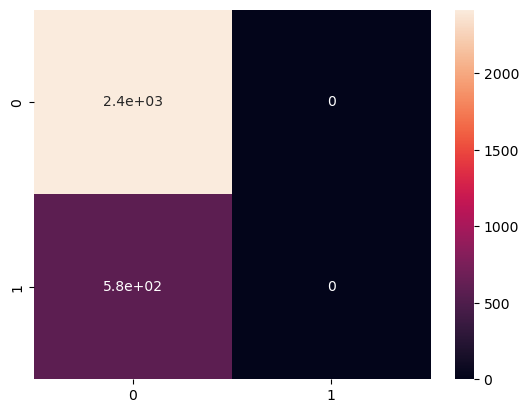

In [27]:
sns.heatmap(conf_matrix, annot=True)

In [55]:
new_data = pd.DataFrame({
    'CreditScore': [70, 950],
    'Gender': [1, 0],
    'Tenure': [5, 3],
    'Balance': [10000.00, 120000.00],
    'NumOfProducts': [2, 1],
    'HasCrCard': [1, 0],
    'IsActiveMember': [1, 0],
    'EstimatedSalary': [100000.00, 80000.00]
})


In [56]:
y_pred = logmodel.predict(x_test)

In [57]:
predictions = logmodel.predict(new_data)
predictions_proba = logmodel.predict_proba(new_data)[:, 1]

In [58]:
print("Predictions:", predictions)
print('exited ', predictions[0])

Predictions: [0 0]
exited  0



# RANDOM FOREST

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean/average prediction of the individual trees.

In [59]:
from sklearn.ensemble import RandomForestClassifier

classifier2 = RandomForestClassifier(n_estimators = 70, criterion = 'gini', random_state = 0)
classifier2.fit(x_train, y_train)

RandomForestClassifier(n_estimators=70, random_state=0)

In [60]:
y_pred = classifier2.predict(x_test)

In [61]:
from sklearn.metrics import accuracy_score
RF_acc = accuracy_score(y_test,y_pred)
RF_acc

0.814

In [62]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred)

0.603411616619795

In [63]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2291,  125],
       [ 433,  151]], dtype=int64)

In [64]:
y_pred = classifier2.predict(x_test)

In [65]:
new_data = pd.DataFrame({
    'CreditScore': [70, 950],
    'Gender': [0, 1],
    'Tenure': [5, 3],
    'Balance': [10000.00, 1200000.00],
    'NumOfProducts': [12, 1],
    'HasCrCard': [1, 1],
    'IsActiveMember': [0, 1],
    'EstimatedSalary': [100000.00, 80000.00]
})

In [66]:
predictions = classifier2.predict(new_data)
predictions_proba = classifier2.predict_proba(new_data)[:, 1]

In [67]:
print("Predictions:", predictions)
print('exited ', predictions[0])

Predictions: [1 0]
exited  1


# Bagging model

Bootstrap Aggregation is a general procedure that can be used to reduce the variance for those algorithm that have high variance. An algorithm that has high variance are decision trees, like classification and regression trees

In [69]:
#PREDICTING
y_pred_bg= model.predict(x_test)

In [68]:
#IMPORTING AND FITTING THE MODEL
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier()
model.fit(x_train, y_train)

BaggingClassifier()

In [71]:
#importing library to check performance
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [72]:
# Accuracy on test Data
BM_model = metrics.accuracy_score(y_test, y_pred_bg)
print('Accuracy: ',BM_model)

Accuracy:  0.8046666666666666


In [73]:
# CONFUSION MATRIX
confusion_matrix=metrics.confusion_matrix(y_test,y_pred_bg)
confusion_matrix

array([[2255,  161],
       [ 425,  159]], dtype=int64)

In [74]:
# CLASSIFICATION REPORT
auc_roc=metrics.classification_report(y_test,y_pred_bg)
print(auc_roc)

              precision    recall  f1-score   support

           0       0.84      0.93      0.89      2416
           1       0.50      0.27      0.35       584

    accuracy                           0.80      3000
   macro avg       0.67      0.60      0.62      3000
weighted avg       0.77      0.80      0.78      3000



In [75]:
#roc_auc score
auc_roc=metrics.roc_auc_score(y_test,y_pred_bg)
auc_roc

0.6028106005624603

In [76]:
y_pred_bg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
new_data = pd.DataFrame({
    'CreditScore': [70, 950],
    'Gender': [0, 1],
    'Tenure': [5, 3],
    'Balance': [10000.00, 1200000.00],
    'NumOfProducts': [12, 1],
    'HasCrCard': [1, 1],
    'IsActiveMember': [0, 1],
    'EstimatedSalary': [100000.00, 80000.00]
})

In [78]:
predictions = model.predict(new_data)
predictions_proba = model.predict_proba(new_data)[:, 1]

In [79]:
print("Predictions:", predictions)
print('exited ', predictions[0])

Predictions: [0 0]
exited  0


In [81]:
lis=['Logistic Regression','Random Forest','Bagging']
accuracy = accuracy, RF_acc, BM_model
Scores=pd.DataFrame({'MODELS':lis,'ACCURACY':accuracy})
Scores

,MODELS,ACCURACY
0,Logistic Regression,0.805333
1,Random Forest,0.814000
2,Bagging,0.804667


In [82]:
Scores[(Scores['ACCURACY']) == max(Scores['ACCURACY'])]

,MODELS,ACCURACY
1,Random Forest,0.814
